In [62]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [40]:
data_true = pd.read_csv('dataset_csv/tumor_subtyping.csv')

In [60]:
matrices = {}

for i in range(10):
    data_pred = pd.read_pickle(f'results/task_2_tumor_subtyping_prostate_s1/split_{i}_results.pkl')

    dictionary_pred = {}
    dictionary_true = {}

    label_pred = []
    label_true = []

    for dictionary in data_pred.items():
        
        dictionary_pred[dictionary[0]] = list(dictionary[1]['prob'].flatten()).index(max(list(dictionary[1]['prob'].flatten())))
        dictionary_true[dictionary[0]] = data_true.loc[data_true['slide_id'] == dictionary[0], 'label'].item().replace('stage_2', '0').replace('stage_3', '1').replace('stage_4','2')


    pred = [i for i in dictionary_pred.values()]
    true = [int(i) for i in dictionary_true.values()]
    matrices[i] = np.matrix(confusion_matrix(true, pred))

In [59]:
sum([i for i in matrices.values()])

matrix([[ 79,  79,   9],
        [ 72, 165,  10],
        [  5,   4,   2]])

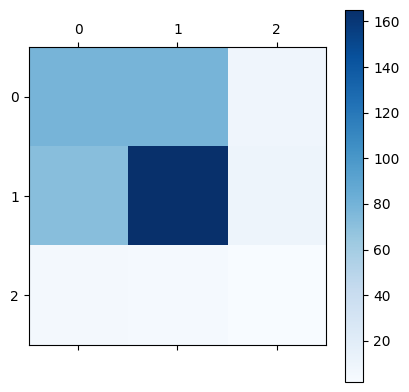

In [65]:
plt.matshow(sum([i for i in matrices.values()]), cmap=plt.cm.Blues)
plt.colorbar()
plt.show()